In [1]:
import os
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [3]:
adatas = [x for x in os.listdir() if x.endswith('.h5ad')]
adatas

['GSM5688711.h5ad',
 'GSM5688710.h5ad',
 'GSM5688707.h5ad',
 'GSM5688709.h5ad',
 'GSM5688708.h5ad',
 'GSM5688706.h5ad']

In [4]:
def load_it(adata):
    adata = sc.read_h5ad( adata)
    adata.obs.index = adata.obs['samples'].astype(str) + '_' + adata.obs.index
    return adata


In [5]:
adatas = [load_it(ad) for ad in adatas]

In [6]:
adatas

[AnnData object with n_obs × n_vars = 7005 × 33694
     obs: 'samples', 'condition', 'location'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 4740 × 33694
     obs: 'samples', 'condition', 'location'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 5063 × 33694
     obs: 'samples', 'condition', 'location'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 6589 × 33694
     obs: 'samples', 'condition', 'location'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 6944 × 33694
     obs: 'samples', 'condition', 'location'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 5352 × 33694
     obs: 'samples', 'condition', 'location'
     var: 'gene_ids', 'feature_types']

In [7]:
def qc(adata):
    

    sc.pp.filter_cells(adata, min_genes = 200)
    
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
    adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True)

    remove = ['total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo', 
          'log1p_total_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb']
    
    adata.obs = adata.obs[[x for x in adata.obs.columns if x not in remove]]
    
    return adata

In [8]:
# Check the first AnnData object
print("First dataset:")
print(adatas[0].obs.head())

# Check the second dataset  
print("\nSecond dataset:")
print(adatas[1].obs.head())

# And so on...

First dataset:
                       samples condition location
711_AAACCCAAGCTCGTGC-1     711     Tumor    Right
711_AAACCCAAGTCGGGAT-1     711     Tumor    Right
711_AAACCCACAGAGGAAA-1     711     Tumor    Right
711_AAACCCACAGGACTTT-1     711     Tumor    Right
711_AAACCCACATGATAGA-1     711     Tumor    Right

Second dataset:
                       samples condition location
710_AAACCCACACCTGTCT-1     710     Tumor    Right
710_AAACCCACACGCTGAC-1     710     Tumor    Right
710_AAACCCACAGGTTCAT-1     710     Tumor    Right
710_AAACCCAGTGTGTCCG-1     710     Tumor    Right
710_AAACCCATCACTTTGT-1     710     Tumor    Right


In [9]:
adatas = [qc(ad) for ad in adatas]

In [10]:
df = pd.concat([x.obs for x in adatas])
df 

,samples,condition,location,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb
711_AAACCCAAGCTCGTGC-1,711,Tumor,Right,2850,2850,7.955425,12521.0,9.435243,40.995128,33.359955,25.301493,0.000000
711_AAACCCAAGTCGGGAT-1,711,Tumor,Right,707,707,6.562444,1396.0,7.242083,26.862464,10.100286,25.716331,0.000000
711_AAACCCACAGAGGAAA-1,711,Tumor,Right,838,838,6.732211,1504.0,7.316548,23.803191,9.441490,13.962767,0.000000
711_AAACCCACAGGACTTT-1,711,Tumor,Right,1630,1630,7.396949,13141.0,9.483568,74.895366,2.610152,4.094057,0.000000
711_AAACCCACATGATAGA-1,711,Tumor,Right,435,435,6.077642,613.0,6.419995,17.781403,0.815661,18.270800,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
706_TTTGGTTTCCCAGTGG-1,706,Tumor,Left,2877,2877,7.964851,8159.0,9.006999,29.305062,17.538914,3.922049,0.036769
706_TTTGGTTTCTATCGCC-1,706,Tumor,Left,4658,4658,8.446556,23600.0,10.069044,17.559322,3.237288,18.135593,0.004237
706_TTTGTTGCATCAGCGC-1,706,Tumor,Left,374,374,5.926926,686.0,6.532334,23.032070,10.932944,33.236153,0.000000
706_TTTGTTGGTAGGAGTC-1,706,Tumor,Left,4019,4019,8.299037,30729.0,10.332994,37.244948,26.398516,33.151096,0.000000


In [11]:
df = df.sort_values('samples')
df

,samples,condition,location,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb
706_TTTGTTGGTTCCTTGC-1,706,Tumor,Left,1875,1875,7.536897,4189.0,8.340456,22.177131,6.182860,12.628312,0.0
706_CCCTTAGCAAGTATAG-1,706,Tumor,Left,1262,1262,7.141245,3737.0,8.226306,28.525555,3.746321,27.883329,0.0
706_CCCTTAGCAGCAGACA-1,706,Tumor,Left,478,478,6.171701,863.0,6.761573,38.122827,11.355736,5.446118,0.0
706_CCCTTAGGTTGTTGTG-1,706,Tumor,Left,1147,1147,7.045777,3316.0,8.106816,34.288299,5.609168,18.727383,0.0
706_CCCTTAGTCACTGTTT-1,706,Tumor,Left,335,335,5.817111,503.0,6.222576,20.477137,2.186879,23.260437,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
711_GTCACTCAGAGAAGGT-1,711,Tumor,Right,1121,1121,7.022868,2944.0,7.987864,23.845109,6.691576,28.974184,0.0
711_GTCACTCAGCGTCAAG-1,711,Tumor,Right,557,557,6.324359,1121.0,7.022868,43.621766,37.912579,3.300624,0.0
711_GTCACTCAGTCGCCCA-1,711,Tumor,Right,1034,1034,6.942157,2474.0,7.813996,24.211803,7.760712,27.607113,0.0
711_GTCAAGTCAGGGAGAG-1,711,Tumor,Right,2779,2779,7.930206,7678.0,8.946244,19.861943,11.669705,12.828861,0.0


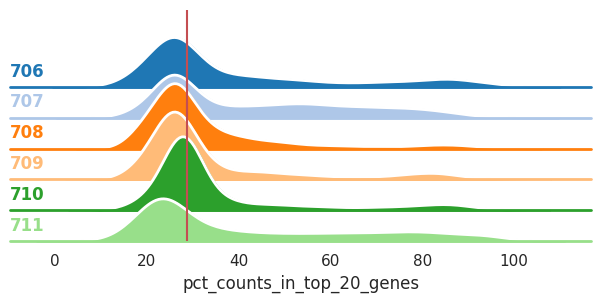

In [13]:
#value = "pct_counts_mt"
#value = "n_genes"
value = 'pct_counts_in_top_20_genes'
#value = "log1p_total_counts"

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df, row="samples", hue="samples", aspect=15, height=0.5, palette="tab20")

g.map(sns.kdeplot, value, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, value, clip_on=False, color="w", lw=2)

g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, value)

g.figure.subplots_adjust(hspace=-.6)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for ax in g.axes.flat:
    ax.axvline(x=df[value].median(), color='r', linestyle='-')


plt.show()

In [ ]:
#Preprocessing (removing outliers and doublets)

In [12]:
import doubletdetection
from scipy.stats import median_abs_deviation as mad
import numpy as np

In [81]:
a = df[df.samples == '710'].pct_counts_in_top_20_genes
a

710_CCCTCAAAGGAGGTTC-1    31.197302
710_CCCTGATTCCGTAATG-1    17.774566
710_CCCTGATTCGAGAATA-1    31.237938
710_CCCTGATTCTACGGTA-1    27.602389
710_CCGATCTAGTTGTCGT-1    27.791262
                            ...    
710_GTCTAGATCGGACCAC-1    84.921628
710_GTCTAGATCGTCGACG-1    28.099593
710_GTCTCACAGATCCTAC-1    26.126761
710_GTCTCACGTACAAGCG-1    29.831650
710_GTCTAGAAGAAGGATG-1    37.143965
Name: pct_counts_in_top_20_genes, Length: 4496, dtype: float64

In [82]:
np.median(a)

np.float64(29.023634645895466)

In [83]:
np.median(a) - 5 * mad(a)

np.float64(12.017161527636162)

In [84]:
np.median(a) + 5 * mad(a)

np.float64(46.03010776415477)

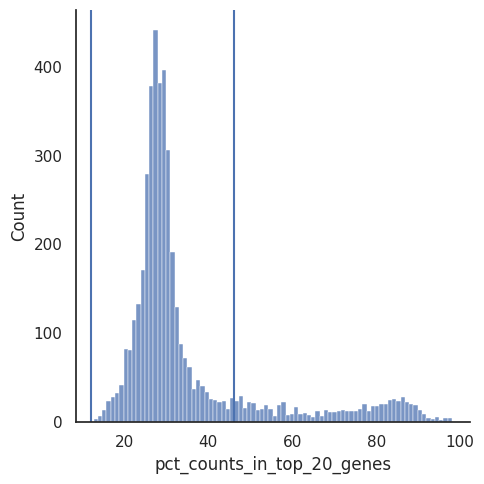

In [85]:
ax = sns.displot(a)

plt.axvline(np.median(a) - 5 * mad(a))
plt.axvline(np.median(a) + 5 * mad(a))

plt.show()

In [12]:
def mad_outlier(adata, metric, nmads, upper_only = False):
    M = adata.obs[metric]
    
    if not upper_only:
        return (M < np.median(M) - nmads * mad(M)) | (M > np.median(M) + nmads * mad(M))
    
    return (M > np.median(M) + nmads * mad(M))

In [13]:
clf = doubletdetection.BoostClassifier(
    n_iters=10,
    clustering_algorithm="louvain",
    standard_scaling=True,
    pseudocount=0.1,
    n_jobs=-1)

In [14]:
def pp(adata):
    adata = adata[adata.obs.pct_counts_mt < 25] #you can lower this based on the overal distribution of your dataset
    
    bool_vector = mad_outlier(adata, 'log1p_total_counts', 5) +\
            mad_outlier(adata, 'log1p_n_genes_by_counts', 5) +\
            mad_outlier(adata, 'pct_counts_in_top_20_genes', 5) +\
            mad_outlier(adata, 'pct_counts_mt', 3, upper_only = True)
    adata = adata[~bool_vector]

    adata.uns['cells_removed'] = sum(bool_vector)

    doublets = clf.fit(adata.X).predict(p_thresh=1e-3, voter_thresh=0.5)
    doublet_score = clf.doublet_score()

    adata.obs["doublet"] = doublets
    adata.obs["doublet_score"] = doublet_score

    adata.uns['doublets_removed'] = adata.obs.doublet.sum()
    adata = adata[adata.obs.doublet == 0]

    return adata
    

In [15]:
adatas = [pp(ad) for ad in adatas]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [16]:
for adata in adatas:
    print(len(adata), adata.uns['cells_removed'], adata.uns['doublets_removed'])

3197 947 189.0
2918 907 197.0
2256 861 48.0
4392 1111 358.0
4036 1094 856.0
2988 990 100.0


In [20]:
df2 = pd.concat([x.obs for x in adatas])
df2 = df2.sort_values('samples')
df2

,samples,condition,location,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,doublet,doublet_score
706_TTTGTTGGTTCCTTGC-1,706,Tumor,Left,1875,1875,7.536897,4189.0,8.340456,22.177131,6.182860,12.628312,0.000000,0.0,6.068948
706_CCCTTAGGTTGTTGTG-1,706,Tumor,Left,1147,1147,7.045777,3316.0,8.106816,34.288299,5.609168,18.727383,0.000000,0.0,0.016050
706_CCCTTAGCAGCAGACA-1,706,Tumor,Left,478,478,6.171701,863.0,6.761573,38.122827,11.355736,5.446118,0.000000,0.0,0.000691
706_CCCTTAGCAAGTATAG-1,706,Tumor,Left,1262,1262,7.141245,3737.0,8.226306,28.525555,3.746321,27.883329,0.000000,0.0,0.149501
706_CCCTGATTCCATCGTC-1,706,Tumor,Left,487,487,6.190315,1110.0,7.013016,27.027027,0.180180,42.612614,0.000000,0.0,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711_GTCACTCCAGTGCGCT-1,711,Tumor,Right,1662,1662,7.416378,2843.0,7.952967,20.576855,3.693282,8.617658,0.035174,0.0,1.903201
711_GTCACTCCAACTGAAA-1,711,Tumor,Right,1043,1043,6.950815,2324.0,7.751475,25.215146,8.304647,24.096386,0.000000,0.0,0.226951
711_GTCACTCAGTCGCCCA-1,711,Tumor,Right,1034,1034,6.942157,2474.0,7.813996,24.211803,7.760712,27.607113,0.000000,0.0,1.352079
711_GTCACGGTCTTGGTGA-1,711,Tumor,Right,1135,1135,7.035269,2355.0,7.764720,20.297240,10.021232,12.229300,0.000000,0.0,6.448845


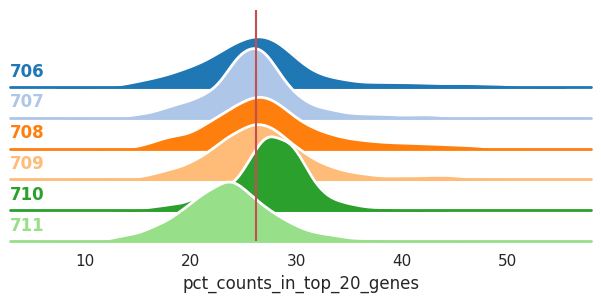

In [19]:
#value = "pct_counts_mt"
#value = "n_genes"
value = 'pct_counts_in_top_20_genes'
#value = "log1p_total_counts"

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df2, row="samples", hue="samples", aspect=15, height=0.5, palette="tab20")

g.map(sns.kdeplot, value, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, value, clip_on=False, color="w", lw=2)

g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, value)

g.figure.subplots_adjust(hspace=-.6)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for ax in g.axes.flat:
    ax.axvline(x=df2[value].median(), color='r', linestyle='-')


plt.show()

In [21]:
output_dir = 'modified_data'
os.makedirs(output_dir, exist_ok=True)

In [22]:
adatas

[View of AnnData object with n_obs × n_vars = 3197 × 33694
     obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'doublet_score'
     var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
     uns: 'cells_removed', 'doublets_removed',
 View of AnnData object with n_obs × n_vars = 2918 × 33694
     obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'doublet_score'
     var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_cou

In [23]:
original_files = ['GSM5688711.h5ad', 'GSM5688710.h5ad', 'GSM5688707.h5ad', 
                  'GSM5688709.h5ad', 'GSM5688708.h5ad', 'GSM5688706.h5ad']


In [24]:
for adata, filename in zip(adatas, original_files):
    output_path = os.path.join(output_dir, filename)
    adata.write_h5ad(output_path)